### StanfordCoreNLP for processing
##### Currently using the tagger only
git - https://github.com/smilli/py-corenlp
<br>
how to run local web server - https://stanfordnlp.github.io/CoreNLP/corenlp-server.html#getting-started
<br>
on output formats - https://stanfordnlp.github.io/CoreNLP/corenlp-server.html
<br><br>
Run in cmd to start server
<br>
cd C:\stanford-corenlp-full-2017-06-09
<br>
java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000


Example usage

In [14]:
from pycorenlp import StanfordCoreNLP
import re

# Initiate CorNLP object
nlp = StanfordCoreNLP('http://localhost:9000')

output = nlp.annotate("Bears bear with other bears.", properties={
                'annotators': 'pos',
                'outputFormat': 'text' # json, xml, 
         })
print(output)

Sentence #1 (6 tokens):
Bears bear with other bears.
[Text=Bears CharacterOffsetBegin=0 CharacterOffsetEnd=5 PartOfSpeech=NNS]
[Text=bear CharacterOffsetBegin=6 CharacterOffsetEnd=10 PartOfSpeech=VBP]
[Text=with CharacterOffsetBegin=11 CharacterOffsetEnd=15 PartOfSpeech=IN]
[Text=other CharacterOffsetBegin=16 CharacterOffsetEnd=21 PartOfSpeech=JJ]
[Text=bears CharacterOffsetBegin=22 CharacterOffsetEnd=27 PartOfSpeech=NNS]
[Text=. CharacterOffsetBegin=27 CharacterOffsetEnd=28 PartOfSpeech=.]



# Pre-process function

Raw text preprocessor

In [15]:
from nltk.stem import WordNetLemmatizer
import re

def preprocess(file_dir):
    """
    Removes special chars , title
    Normalizes spaces>2  to one
    """

    title = re.compile(r"%&%.*%&%")
    special_chars = re.compile(r"[!@##$$%^&*(),:\"]") 
    parag_tag = re.compile("<p>")
    
    text = open(file_dir, 'r', encoding = 'utf-8').read()
    
    text = re.sub(title, "", text)
    text = re.sub(special_chars, "", text)
    text = re.sub(parag_tag, "", text)
    text = re.sub("\s{2,}", " ",text) # Normalize 2 > whitespace to 1 whitespace
    
    return text

In [16]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag): 
    """
    Changes treebank tags to Wordnet tags to be fed into the WordNet lemmatizer
    Returns -1 except for ADJ, VERB, NOUN, ADV
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
#     elif treebank_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return -1

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 


def parse_text(text, pos_filter = True, 
                     lemmatize = True,
                     stopWords_filter = True,
                     show_pos = False):
    """
    Parses text via the Stanford parser, filters outuput based on POS tags to be fed into lemmatizer (reference: get_wordnet_pos)  
    Removes stop words from the output
    Possible annotators: tokenize, ssplit, pos, lemma, ner, parse, dcoref
    Possible outputFormats: text, json, xml, Serialized
    """

    if (stopWords_filter == True):
        stopWords = stopwords.words('English')
        with open(r"C:\nlp\extra_stopwords.txt", 'r', encoding = 'UTF-8') as f:
            extra_stopWords = f.read()
            extra_stopWords = extra_stopWords.split("\n")
            stopWords.append(extra_stopWords)
            
    if (lemmatize == True):
        wordNet = WordNetLemmatizer()

        
    text = text.lower()
    
    output = nlp.annotate(text, properties={
            'annotators': 'ssplit, pos', 
            'outputFormat': 'json'
            })
    
    word_tags_list = []
    for sentence in output['sentences']:
        for item in sentence['tokens']:
            
            word = item['word']
            pos = item['pos']
            
            # Do not add to list if:
            if (pos_filter == True) & (get_wordnet_pos(pos) == -1)): # kept POS: ADJ, VERB, NOUN, ADV 
                continue
            if (stopWords_filter == True) & (word in stopWords): 
                continue
            
            if (lemmatize == True):
                word = wordNet.lemmatize(word, get_wordnet_pos(pos))
            elif (show_pos == False):
                word_tags_list.append(word)
            elif (show_pos == True):
                word_tags_list.append(word + "_"+ pos)
            
    return word_tags_list

### Show difference w/ and w/o lemmatize 

In [18]:
directory = r"C:\nlp\Science-related texts"
file_list = [file for file in os.listdir(directory) if file.endswith('.txt')]

temp_dir = directory+"\\"+file_list[1]

In [19]:
from pprint import pprint
temp = preprocess(temp_dir)
lemmatized = parse_text(temp,lemmatize=False, show_pos=True)
not_lemmatized = parse_text(temp,lemmatize=True, show_pos=True)

pprint(list(zip(lemmatized, not_lemmatized)))

[('section_NN', 'section_NN'),
 ('findings_NNS', 'finding_NNS'),
 ('readers_NNS', 'reader_NNS'),
 ('cosmo_NN', 'cosmo_NN'),
 ('animal_NN', 'animal_NN'),
 ('behaviour_NN', 'behaviour_NN'),
 ('quite_RB', 'quite_RB'),
 ('obvious_JJ', 'obvious_JJ'),
 ('females_NNS', 'female_NNS'),
 ('world_NN', 'world_NN'),
 ('concerned_VBN', 'concern_VBN'),
 ('finding_VBG', 'find_VBG'),
 ('right_JJ', 'right_JJ'),
 ('mate_NN', 'mate_NN'),
 ('females_NNS', 'female_NNS'),
 ('pair-bonding_JJ', 'pair-bonding_JJ'),
 ('species_NNS', 'specie_NNS'),
 ('swans_NNS', 'swan_NNS'),
 ('mate_VBP', 'mate_VBP'),
 ('life_NN', 'life_NN'),
 ('monogamous_JJ', 'monogamous_JJ'),
 ('south_RB', 'south_RB'),
 ('american_JJ', 'american_JJ'),
 ('monkeys_NNS', 'monkey_NNS'),
 ('competency_NN', 'competency_NN'),
 ('fatherhood_NN', 'fatherhood_NN'),
 ('potential_JJ', 'potential_JJ'),
 ('mate_NN', 'mate_NN'),
 ('desirable_JJ', 'desirable_JJ'),
 ('quality_NN', 'quality_NN'),
 ('many_JJ', 'many_JJ'),
 ('species_NNS', 'specie_NNS'),
 ('cour

In [173]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [227]:
document1 = tb("""Python is a 2000 made-for-TV horror movie directed by Richard
Clabaugh. The film features several cult favorite actors, including William
Zabka of The Karate Kid fame, Wil Wheaton, Casper Van Dien, Jenny McCarthy,
Keith Coogan, Robert Englund (best known for his role as Freddy Krueger in the
A Nightmare on Elm Street series of films), Dana Barron, David Bowe, and Sean
Whalen. The film concerns a genetically engineered snake, a python, that
escapes and unleashes itself on a small town. It includes the classic final
girl scenario evident in films like Friday the 13th. It was filmed in Los Angeles,
 California and Malibu, California. Python was followed by two sequels: Python
 II (2002) and Boa vs. Python (2004), both also made-for-TV films.""")

document2 = tb("""Python, from the Greek word (πύθων/πύθωνας), is a genus of
nonvenomous pythons[2] found in Africa and Asia. Currently, 7 species are
recognised.[2] A member of this genus, P. reticulatus, is among the longest
snakes known.""")

document3 = tb("""The Colt Python is a .357 Magnum caliber revolver formerly
manufactured by Colt's Manufacturing Company of Hartford, Connecticut.
It is sometimes referred to as a "Combat Magnum".[1] It was first introduced
in 1955, the same year as Smith &amp; Wesson's M29 .44 Magnum. The now discontinued
Colt Python targeted the premium revolver market segment. Some firearm
collectors and writers such as Jeff Cooper, Ian V. Hogg, Chuck Hawks, Leroy
Thompson, Renee Smeets and Martin Dougherty have described the Python as the
finest production revolver ever made.""")

bloblist = [document1, document2, document3]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:30]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	Word: python, TF-IDF: 0.01662
	Word: films, TF-IDF: 0.00997
	Word: made-for-TV, TF-IDF: 0.00665
	Word: film, TF-IDF: 0.00665
	Word: on, TF-IDF: 0.00665
	Word: California, TF-IDF: 0.00665
	Word: 2000, TF-IDF: 0.00332
	Word: horror, TF-IDF: 0.00332
	Word: movie, TF-IDF: 0.00332
	Word: directed, TF-IDF: 0.00332
	Word: Richard, TF-IDF: 0.00332
	Word: Clabaugh, TF-IDF: 0.00332
	Word: features, TF-IDF: 0.00332
	Word: several, TF-IDF: 0.00332
	Word: cult, TF-IDF: 0.00332
	Word: favorite, TF-IDF: 0.00332
	Word: actors, TF-IDF: 0.00332
	Word: including, TF-IDF: 0.00332
	Word: William, TF-IDF: 0.00332
	Word: Zabka, TF-IDF: 0.00332
	Word: Karate, TF-IDF: 0.00332
	Word: Kid, TF-IDF: 0.00332
	Word: fame, TF-IDF: 0.00332
	Word: Wil, TF-IDF: 0.00332
	Word: Wheaton, TF-IDF: 0.00332
	Word: Casper, TF-IDF: 0.00332
	Word: Van, TF-IDF: 0.00332
	Word: Dien, TF-IDF: 0.00332
	Word: Jenny, TF-IDF: 0.00332
	Word: McCarthy, TF-IDF: 0.00332
Top words in document 2
	Word: genus, TF-IDF: 0

### Get file list from dir

In [20]:
import os

directory = r"C:\nlp\Science-related texts"
file_list = [file for file in os.listdir(directory) if file.endswith('.txt')]

print( len(file_list), "text files detected!")

10258 text files detected!


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def draw_cloud(text_string, x=20, y=20):
#     wordcloud = WordCloud().generate(text = text_string)

#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=400).generate(text = text_string)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.figure(figsize=(x,y))
    plt.axis("off")
    plt.show()
    
# For showing in a new window  
#     wordcloud = WordCloud().generate(text = text_string)
#     image = wordcloud.to_image()
#     image.show()

#### Word cloud for each article (control by index num)

#### Word Cloud for each genre  

In [23]:
acad_files = [file for file in file_list if file.startswith("acad")]
mag_files = [file for file in file_list if file.startswith("mag")]
news_files = [file for file in file_list if file.startswith("news")]

print( len(acad_files) , "academic texts\n",
       len(mag_files) , "magazine texts\n",
       len(news_files) , "newspaper texts")

4155 academic texts
 5781 magazine texts
 322 newspaper texts


Academic genre

In [24]:
import sys
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

all_text = ""

for file in acad_files:
    try:
        text = preprocess(os.path.join(directory, file))
        text = parse_text(text, show_pos = True)
        parsed = ' '.join(text)
        all_text += parsed 
    except:
        print("Error at file:", file, sys.exc_info()[0])
        
file = open(r"C:\NLP\academic_parseddd.txt","w")
file.write("%r" % all_text)
file.close()

print("Academic texts -", len(all_text), "words")

draw_cloud(all_text)

Error at file: acad_6338.txt <class 'TypeError'>
Error at file: acad_6574.txt <class 'TypeError'>
Error at file: acad_7203.txt <class 'TypeError'>
Error at file: acad_8384.txt <class 'TypeError'>
Error at file: acad_8858.txt <class 'TypeError'>
Error at file: acad_9466.txt <class 'TypeError'>
Error at file: acad_9632.txt <class 'TypeError'>
Error at file: acad_9650.txt <class 'TypeError'>
Error at file: acad_9830.txt <class 'TypeError'>


FileNotFoundError: [Errno 2] No such file or directory: 'C;\\NLP\\academic_parsed.txt'

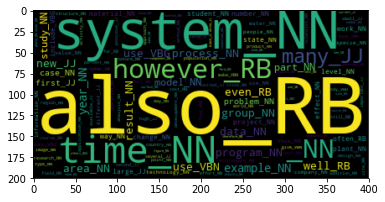

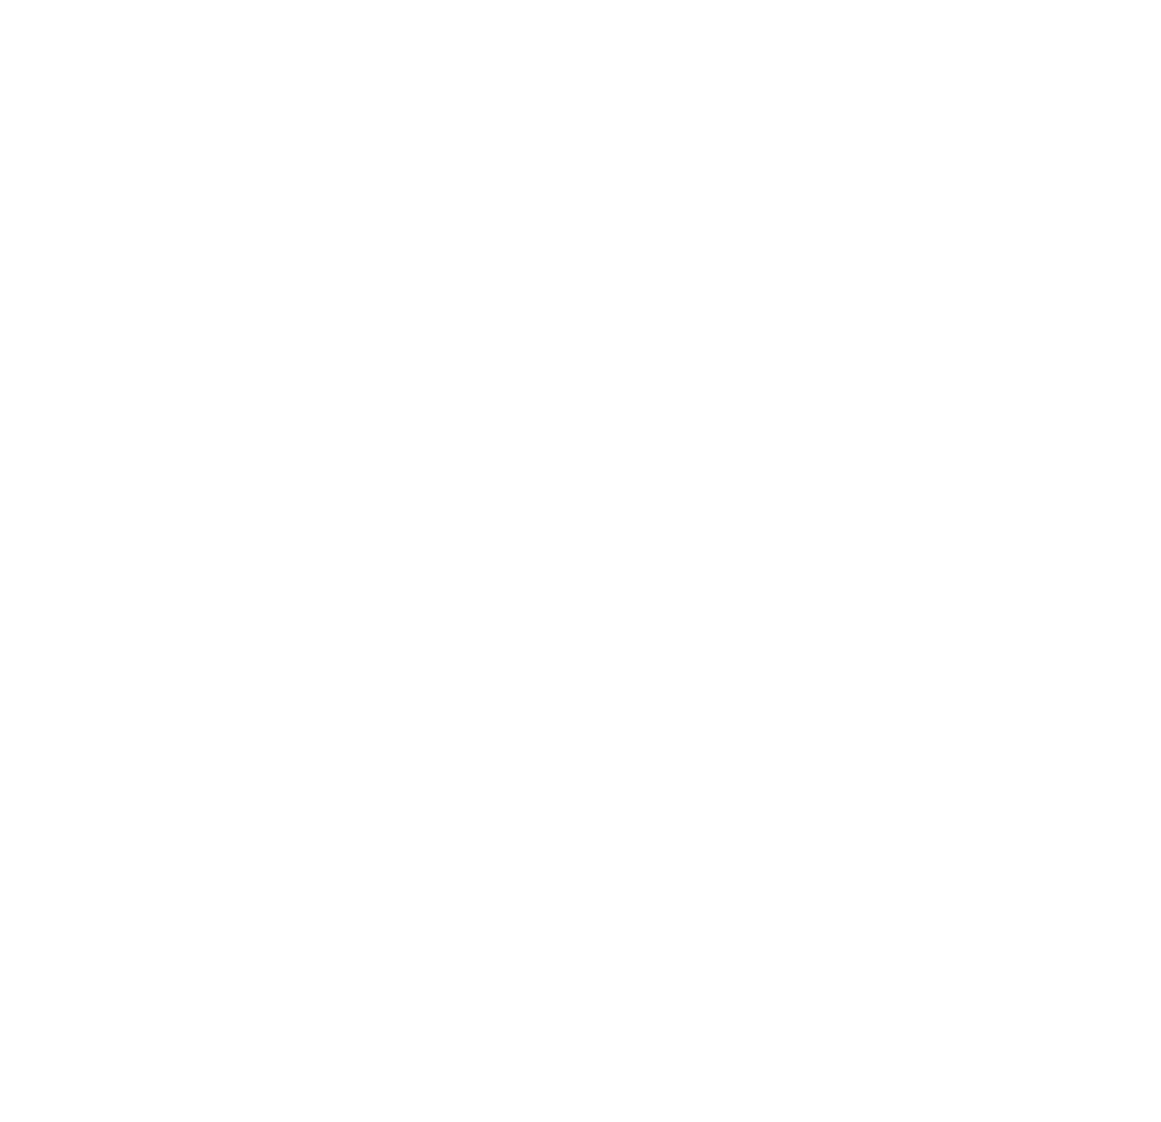

In [53]:
draw_cloud(all_text)

Magazine genre

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

all_text = ""

for file in mag_files:
    text = preprocess(os.path.join(directory, file))
    processed = ' '.join(text)
    all_text += processed 
    
print("Magazine texts -", len(all_text), "words")

draw_cloud(all_text)

Newspaper genre

Newspaper texts - 2079453 words


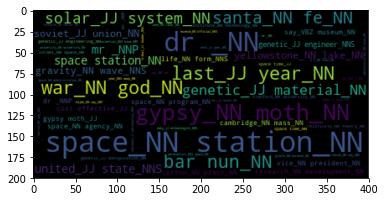

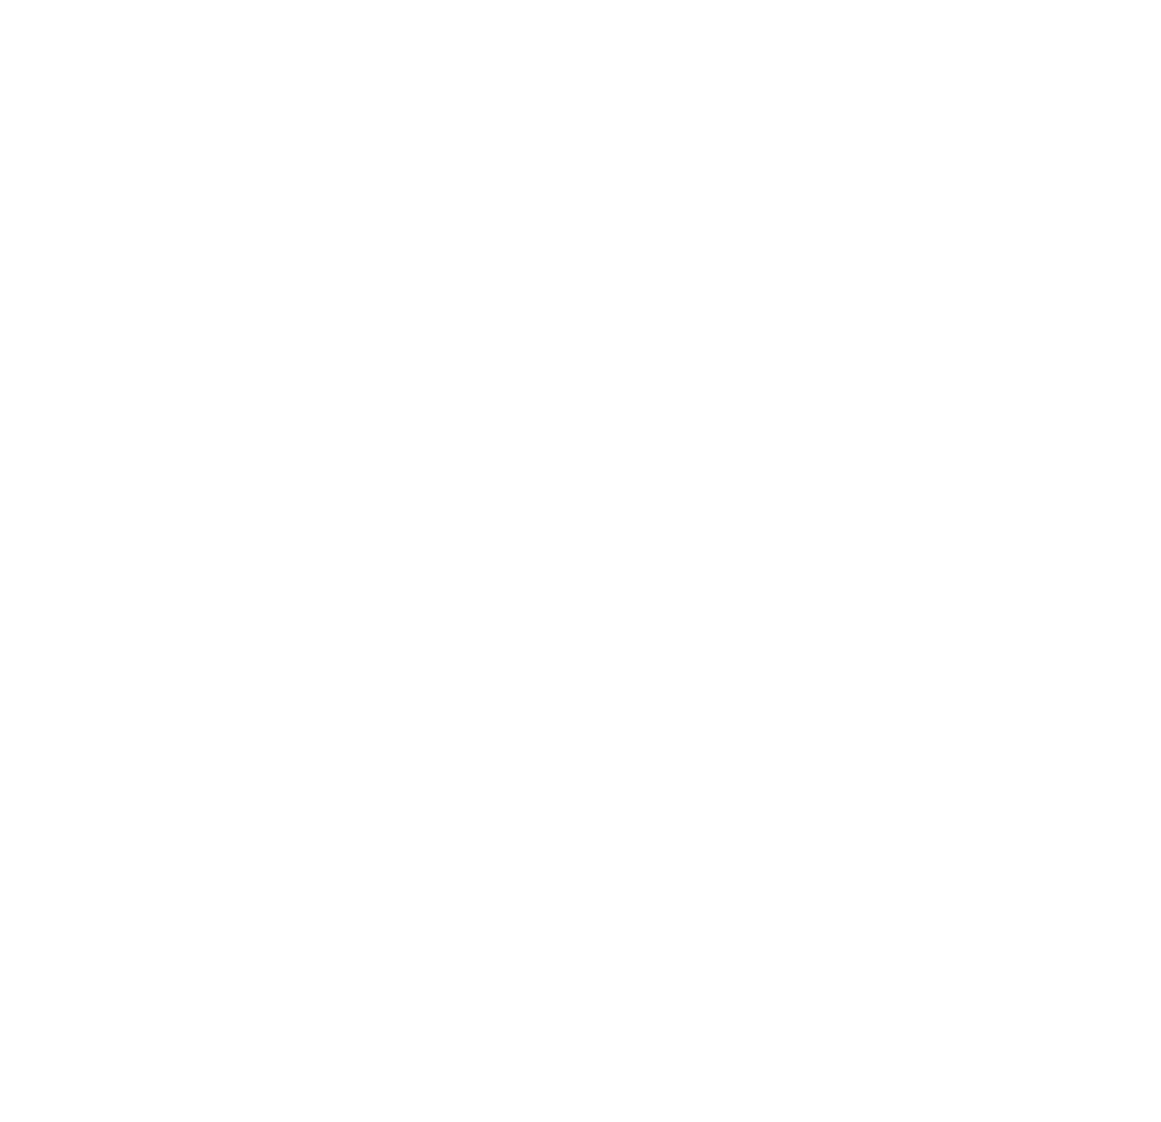

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline

all_text = ""

for file in news_files:
    try:
        text = preprocess(os.path.join(directory, file))
        text = parse_text(text,show_pos=True)
        parsed = ' '.join(text)
        all_text += parsed 
    except:
        print("Error at file:", file, sys.exc_info()[0])

print("Newspaper texts -", len(all_text), "words")

draw_cloud(all_text)

* Old code

In [26]:

################### Settings ###################
#Stop words
stopWords = set(stopwords.words('english'))
stopWords.update(extra_stopWords)
stopWords = list(stopWords)[1:] # spliting by \n makes whitespace at index 0, get rid of it

# WordNet can take POS tags too
lemmatizer = WordNetLemmatizer()

# Title pattern
title = re.compile(r"%&%.*%&%")

# Special chars and tags removal
special_chars = re.compile(r"[!@##$$%^&*(),:'\"]")
paragraph_tag = re.compile(r"<p>")

# To parse Stanford NLP output
word_pattern = re.compile(r'\[Text=[A-Za-z]+')
pos_pattern = re.compile(r'=[A-Z]{,4}]')

# For NLP output
word_tags_list = []

################### NLP #######################

# Erase title
text = re.sub(title, "", text)
# Special chars
text = re.sub(special_chars, "", text)
# Tags
text = re.sub(paragraph_tag, "", text)

# Divide into sentences
sent_tokenize_list = sent_tokenize(text)


### * In case of converting list to counts

In [31]:
from collections import Counter
counts = dict(Counter(text))
print(counts)

{'sunlight': 4, 'central': 1, 'source': 7, 'united': 3, 'state': 4, 'energy': 24, 'st': 1, 'century': 2, 'sprawling': 1, 'low': 1, 'rise': 1, 'campus': 1, 'solar': 11, 'research': 7, 'institute': 2, 'seri': 6, 'answer': 2, 'resounding': 1, 'yes': 1, 'politically': 1, 'may': 1, 'coming': 2, 'time': 1, 'conventional': 4, 'power': 13, 'generation': 1, 'coal': 2, 'oil': 6, 'natural': 1, 'gas': 6, 'increasing': 1, 'fire': 1, 'environmentally': 2, 'conscious': 1, 'public': 2, 'concerned': 1, 'global': 2, 'warming': 2, 'acid': 1, 'rain': 1, 'air': 2, 'pollution': 2, 'also': 2, 'concern': 1, 'national': 1, 'security': 1, 'implication': 1, 'dependence': 1, 'nearly': 3, 'percent': 10, 'imported': 1, 'nuclear': 7, 'touted': 1, 'clean': 1, 'alternative': 5, 'suffering': 1, 'continuing': 2, 'revelation': 1, 'following': 2, 'explosion': 1, 'soviet': 1, 'reactor': 1, 'chernobyl': 1, 'station': 2, 'political': 1, 'difficulty': 1, 'surrounding': 1, 'start': 1, 'seabrook': 1, 'plant': 7, 'new': 2, 'hamp